In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as ply
# set style to the plots
plt.style.use('ggplot')

#for interactive visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot

import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

C:\Users\kiran kumar\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dat = ff.create_table(data.head())
dat
py.plot(dat)

'temp-plot.html'

In [4]:
data.shape

(200, 5)

In [5]:
data.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


Text(0.5, 1.0, 'Distributin of Age')

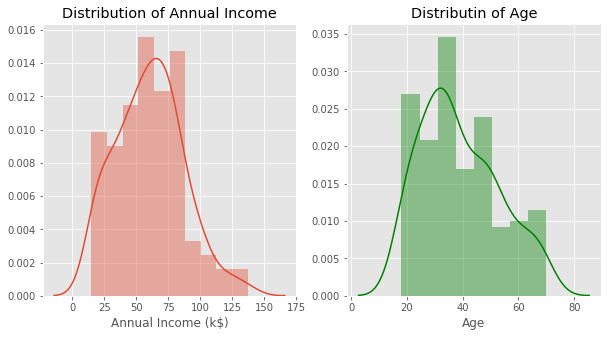

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(121)
fig1 = sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.subplot(122)
fig2 = sns.distplot(data['Age'],color = 'g')
plt.title('Distributin of Age')

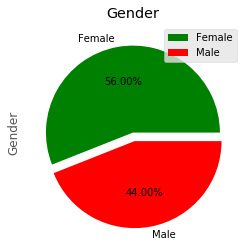

In [7]:
data['Gender'].value_counts().plot(kind = 'pie',explode = [0,0.1],autopct = '%.2f%%',colors = ['green','red'])
plt.title('Gender')
plt.legend()

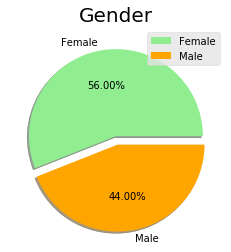

In [8]:
size = data['Gender'].value_counts()
labels = data['Gender'].value_counts().index
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

#plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode,labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

        Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

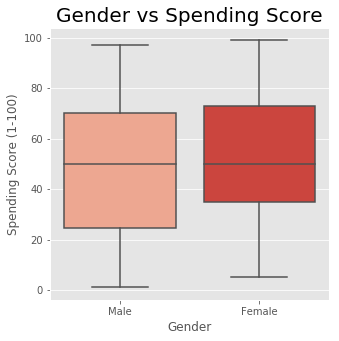

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Reds')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Bi-variate Analysis between Gender and Spending Score,

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

## Based on Spending score and Annual Income

### Feature sleection for the model


In [10]:
#Considering only 2 features (Annual income and Spending Score) and no Label available
X = data.iloc[:,[3,4]].values

### Building the Model


In [11]:
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans

In [12]:
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',
              random_state=0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
#inertia_ is the formula used to sum of suared dist from closest cluster centroid

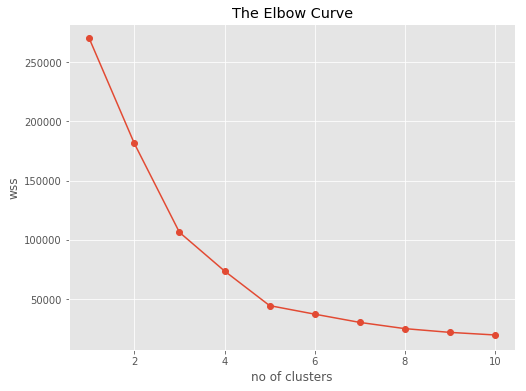

In [13]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wss,marker = 'o')
plt.title('The Elbow Curve')
plt.xlabel('no of clusters')
plt.ylabel('wss')
plt.show()

In [14]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

In [15]:
kmeansmodel.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [16]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

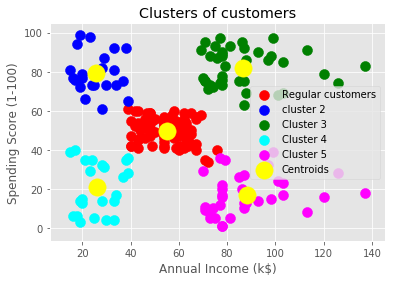

In [17]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Regular customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Cluster 5 (Red Color) -> earning high but spending less
#cluster 1 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 2 (cyan Color) -> earning less but spending more
#Cluster 4 (magenta Color) -> Earning less , spending less


######We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse ######
#wherein others we can set like once in a week or once in a month



## Visualizing the Clusters of Hierarchial Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
kmmodel = AgglomerativeClustering(n_clusters= 5)
y_pred= kmmodel.fit_predict(X)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

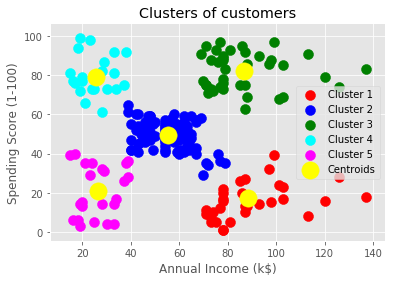

In [20]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Hirarchy clustering

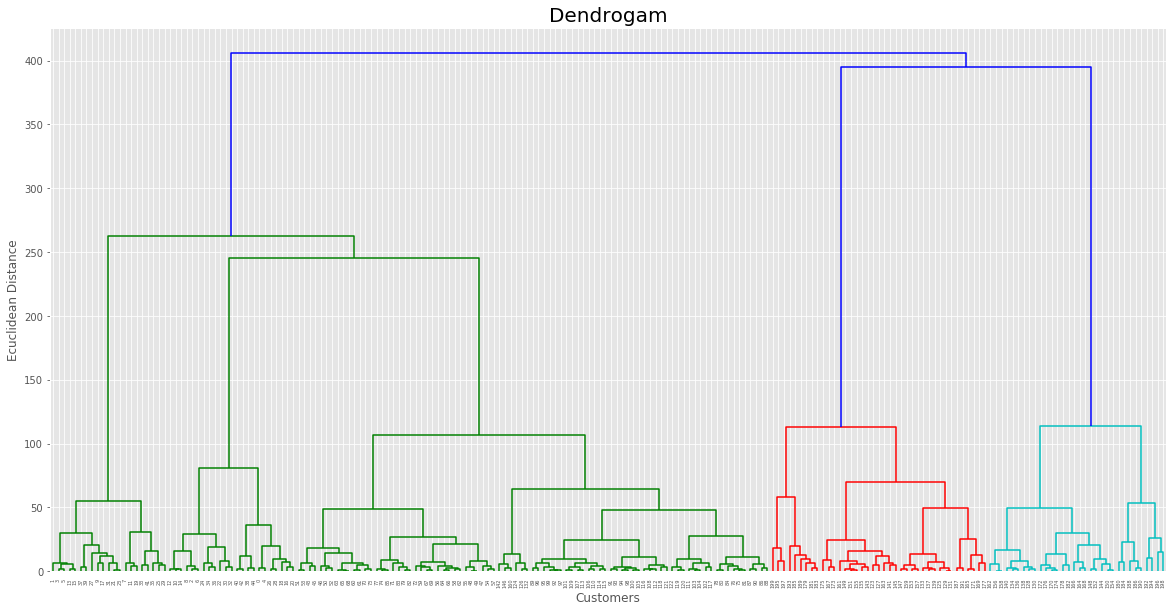

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


## Clusters of Customers Based on their Ages

In [22]:
x = data.loc[:,['Age','Spending Score (1-100)']].values

In [23]:
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',
              random_state=0)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)

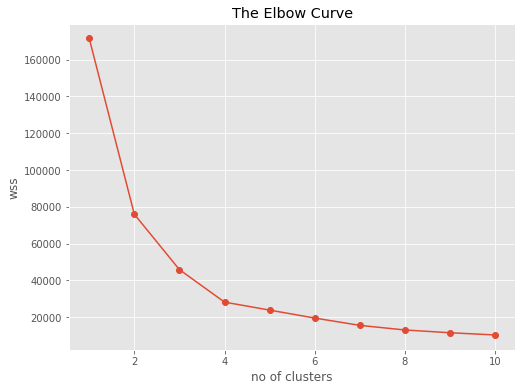

In [24]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wss,marker = 'o')
plt.title('The Elbow Curve')
plt.xlabel('no of clusters')
plt.ylabel('wss')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4,init='k-means++',
              random_state=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [26]:
y_pred4 = kmeans.fit_predict(x)

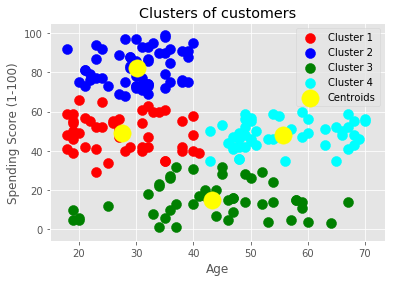

In [27]:
plt.scatter(x[y_pred4 == 0, 0], x[y_pred4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_pred4 == 1, 0], x[y_pred4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_pred4 == 2, 0], x[y_pred4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_pred4 == 3, 0], x[y_pred4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.



In [28]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [29]:
print(centroids)

[[45.2173913  20.91304348 26.30434783]
 [43.08860759 49.56962025 55.29113924]
 [32.69230769 82.12820513 86.53846154]
 [40.66666667 17.58333333 87.75      ]
 [25.52173913 78.56521739 26.30434783]]


In [30]:
data['labels'] =  labels
trace1 = go.Scatter3d(x= data['Age'],y= data['Spending Score (1-100)'],z= data['Annual Income (k$)'],
                        mode='markers',marker=dict(color = data['labels'], size= 10,line=dict(color= data['labels'],
                        width= 12),opacity=0.8))
df = [trace1]
layout = go.Layout(title = 'Character vs Gender vs Alive or not',
                   margin=dict(l=0,r=0,b=0,t=0),
                   scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Spending Score'),
                                zaxis = dict(title  = 'Annual Income')))

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)